In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, read_files,\
    top_mean_dev_auc, top_min_whole_validation_auc, top_min_dev_auc, read_files, LOGREG_LOG_PARAMETERS,\
    LOGREG_CONT_PARAMETERS

In [2]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
files = ['./experiments/logreg.pkl', './experiments/logreg-liblinear.pkl']

In [5]:
top_k = 1000

best_mean_dev = top_mean_dev_auc(read_files(files), top_k)
best_min_dev = top_min_dev_auc(read_files(files), top_k)
true_best = top_min_whole_validation_auc(read_files(files), top_k)

In [6]:
compare_columns = ['mean_dev_auc', 'mean_validation_auc',
               'mean_whole_validation_auc', 'max_overfit_auc',
                   'min_dev_auc', 'min_validation_auc', 'min_whole_validation_auc']

In [7]:
best_mean_dev[compare_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_dev_auc,1000.0,0.836172,0.000017,0.836144,0.836159,0.836171,0.836184,0.836219
mean_validation_auc,1000.0,0.810411,0.000094,0.810226,0.810348,0.810388,0.810459,0.810759
mean_whole_validation_auc,1000.0,0.811592,0.000083,0.811438,0.811530,0.811572,0.811657,0.811792
max_overfit_auc,1000.0,0.027213,0.000245,0.026389,0.027037,0.027239,0.027408,0.027723
min_dev_auc,1000.0,0.814031,0.000205,0.813577,0.813872,0.814022,0.814179,0.814668
min_validation_auc,1000.0,0.808584,0.000113,0.808291,0.808508,0.808583,0.808661,0.808971
min_whole_validation_auc,1000.0,0.811592,0.000083,0.811438,0.811530,0.811572,0.811657,0.811792


In [8]:
best_min_dev[compare_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_dev_auc,1000.0,0.835570,0.000191,0.835028,0.835469,0.835592,0.835718,0.835952
mean_validation_auc,1000.0,0.809854,0.000609,0.809045,0.809453,0.809660,0.809993,0.811803
mean_whole_validation_auc,1000.0,0.810860,0.000368,0.810250,0.810616,0.810795,0.810960,0.812112
max_overfit_auc,1000.0,0.024757,0.000391,0.023955,0.024479,0.024803,0.025085,0.025467
min_dev_auc,1000.0,0.815377,0.000101,0.815238,0.815290,0.815359,0.815456,0.815656
min_validation_auc,1000.0,0.808466,0.000611,0.807749,0.808067,0.808264,0.808649,0.810415
min_whole_validation_auc,1000.0,0.810860,0.000368,0.810250,0.810616,0.810795,0.810960,0.812112


In [9]:
true_best[compare_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_dev_auc,1000.0,0.834911,0.000462,0.833698,0.834543,0.834950,0.835290,0.835807
mean_validation_auc,1000.0,0.812055,0.000335,0.811042,0.811794,0.812034,0.812334,0.812693
mean_whole_validation_auc,1000.0,0.812392,0.000183,0.812141,0.812244,0.812350,0.812515,0.812898
max_overfit_auc,1000.0,0.025105,0.000842,0.023784,0.024348,0.024942,0.025835,0.026855
min_dev_auc,1000.0,0.813916,0.000700,0.812204,0.813456,0.813968,0.814418,0.815199
min_validation_auc,1000.0,0.810256,0.000528,0.808565,0.809973,0.810376,0.810629,0.811107
min_whole_validation_auc,1000.0,0.812392,0.000183,0.812141,0.812244,0.812350,0.812515,0.812898


In [10]:
best_mean_dev.merge(true_best, on=['file', 'experiment_id'])\
    .groupby(['file', 'experiment_id']).ngroups

0

In [11]:
best_mean_dev.merge(true_best, on=['file', 'experiment_id']).shape

(0, 136)

In [12]:
best_min_dev.merge(true_best, on=['file', 'experiment_id'])\
    .groupby(['file', 'experiment_id']).ngroups

0

In [13]:
best_min_dev.merge(true_best, on=['file', 'experiment_id']).shape

(0, 136)

In [14]:
best = best_mean_dev

In [15]:
best.shape

(1000, 69)

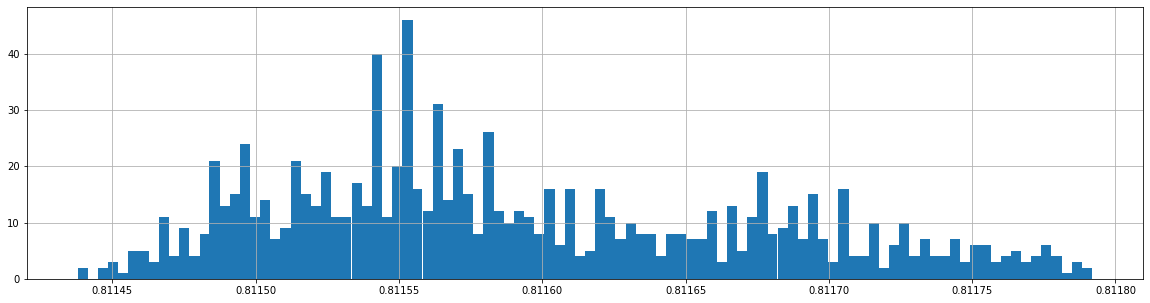

In [16]:
best.min_whole_validation_auc.hist(bins=100);

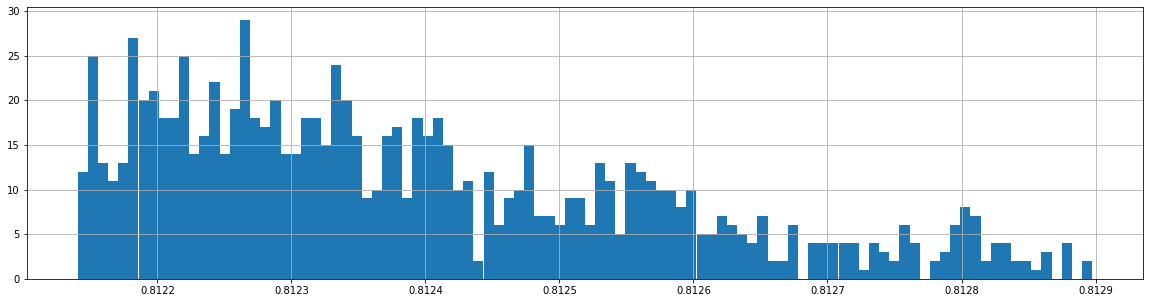

In [17]:
true_best.min_whole_validation_auc.hist(bins=100);

In [18]:
best.groupby('param_clf__fit_intercept').size()

param_clf__fit_intercept
False    499
True     501
dtype: int64

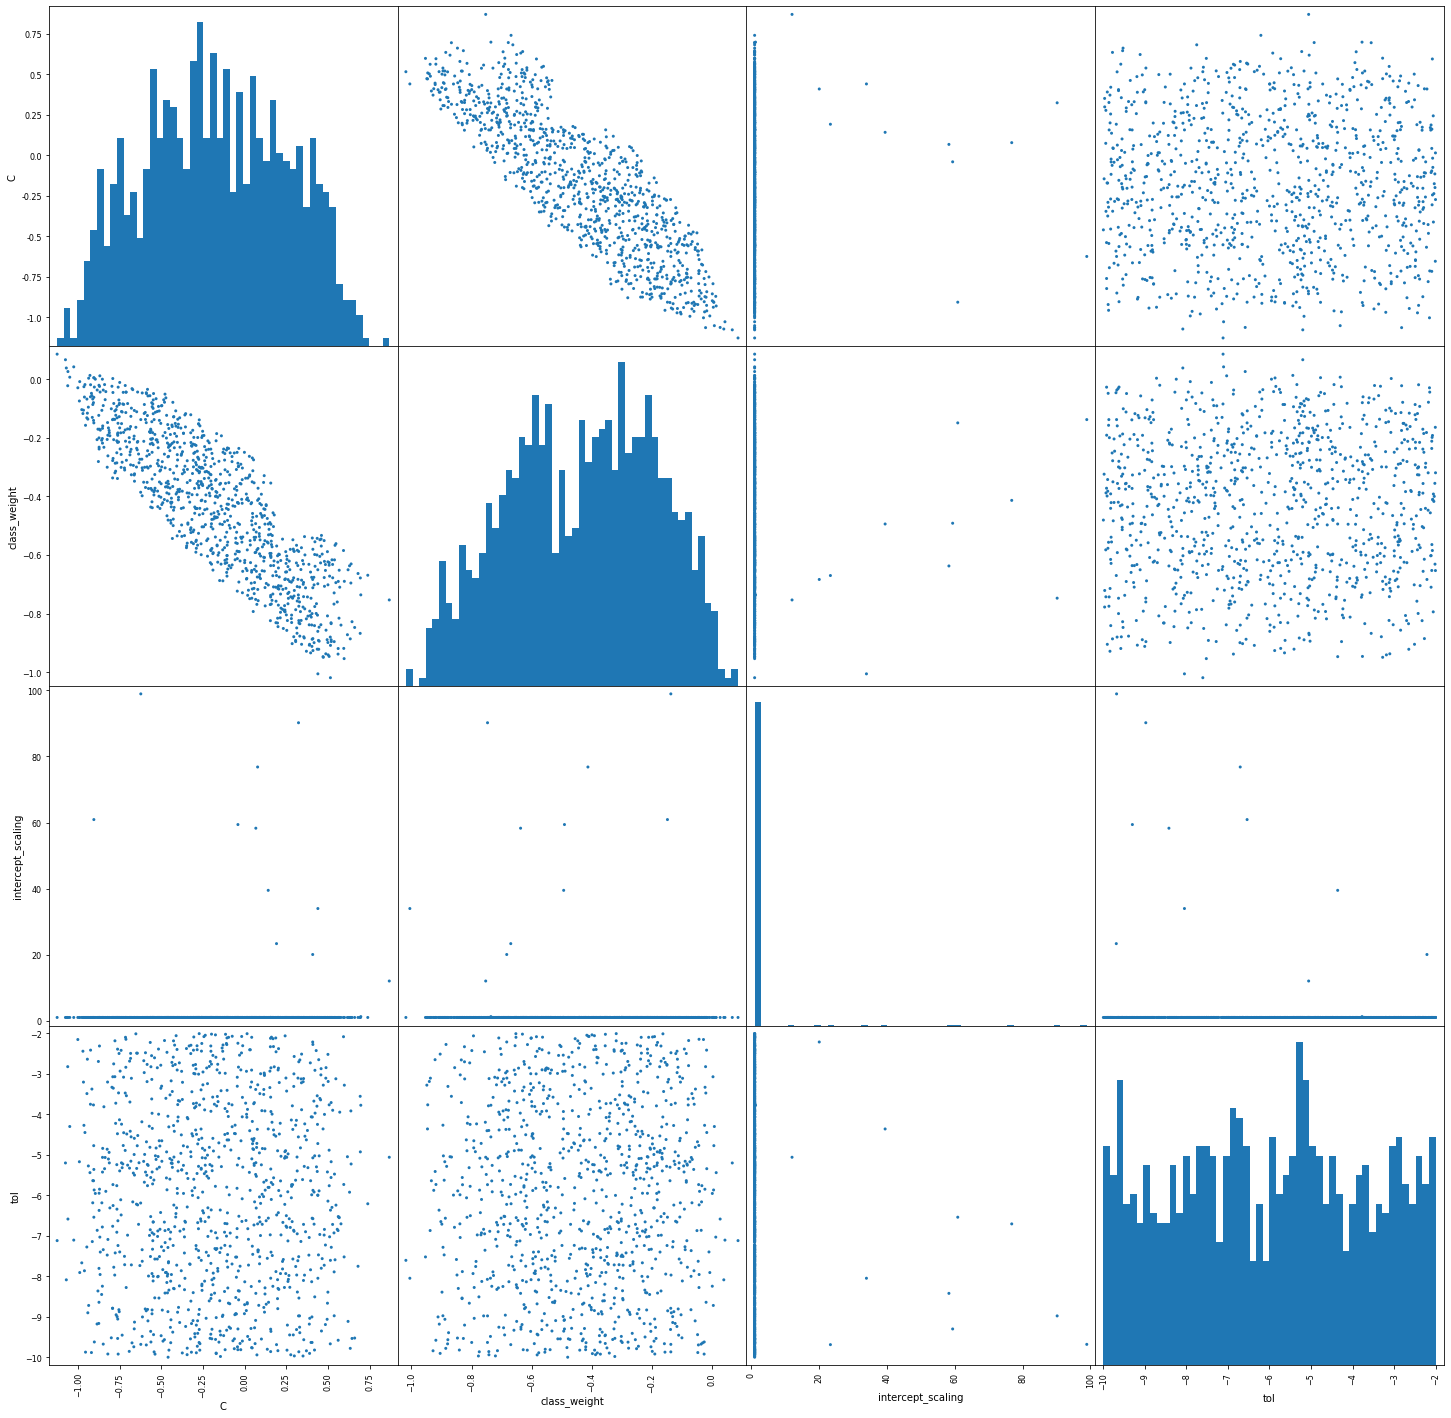

In [19]:
pd.plotting.scatter_matrix(
    pd.concat([np.log10(best[list(set(LOGREG_LOG_PARAMETERS))]), best[LOGREG_CONT_PARAMETERS]],
              axis='columns',
              sort=True
             ).rename(lambda x: x.replace('param_clf__', ''), axis='columns').sort_index(axis=1),
    alpha=1, figsize=(25, 25), hist_kwds={'bins': 50});

### top parameters

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(best.sort_values('mean_dev_auc', ascending=False).head().T)

                                                               0  \
cnt                                                            1   
experiment_id                                              38521   
file                                    ./experiments/logreg.pkl   
iteration                                                      1   
max_dev_auc                                             0.852982   
max_dev_binary_error                                    0.786158   
max_dev_binary_logloss                                  0.463761   
max_overfit_auc                                        0.0271965   
max_overfit_binary_error                               0.0101552   
max_overfit_binary_logloss                             0.0217848   
max_validation_auc                                      0.812714   
max_validation_binary_error                             0.775727   
max_validation_binary_logloss                           0.469564   
max_whole_train_auc                             